# ANALYSIS OF TRENDING VENUES WORLWIDE FOR BUSINESS PROJECT
## FINAL CAPSTONE PROJECT

### For this project we will be looking at the top trending venues in the biggest and richest cities in the world to get a list of the businesses trend to answer a local entrepreneur.

### The client wants to open a new business in South of France, he already owns 3 restaurants there, by the iconic French Riviera and asked me to help him by creating a list of businesses that attract people around the world. We'll then compare what can be found in his city with what we previously found worldwide.

#### Necessary libraries:

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import json
!pip install folium
import folium
import types
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported!')

     |████████████████████████████████| 92kB 17.1MB/s eta 0:00:01
Libraries imported!


## I- Trending venues worldwide

### According to the website Forbes.com the 10 top richest cities in the world are as follows:
#### 1- New York City
#### 2- Hong Kong
#### 3- Moscow
#### 4- Beijing
#### 5- London
#### 6- Shangai
#### 7- San Francisco
#### 8- Shenzhen
#### 9- Seoul
#### 10- Mumbai

source: https://www.forbes.com/sites/cartercoudriet/2019/03/07/richest-cities-in-the-world-the-top-10-cities-with-the-most-billionaires/

#### Foursquare Credentials

In [2]:
# The code was removed by Watson Studio for sharing.

Foursquare Credentials saved!


### 1- New York

#### Get the coordinates

In [3]:
address = 'New York, USA'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of New York are 40.7127281, -74.0060152.


#### Create URL to get list of trending venues from Foursquare

In [4]:
LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

#### Take a look at the json result

In [5]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e0b70290cc1fd001bbc679b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'totalResults': 228,
  'suggestedBounds': {'ne': {'lat': 40.757728145000044,
    'lng': -73.94675840634194},
   'sw': {'lat': 40.667728054999955, 'lng': -74.06527199365804}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5afe1a97c62b49002c806600',
       'name': "Trader Joe's",
       'location': {'address': '233 Spring Street',
        'lat': 40.72561105671141,
        'lng': -74.00498490487023,
        'labeledLatLngs': [{'label': 'display',

#### Save results in a dataframe

In [6]:
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)
dataframe.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.delivery.id,venue.delivery.provider.icon.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.name,venue.delivery.url,...,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-9-5afe1a97c62b49002c806600-0,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'label': 'display', 'lat': 40.72561105671141...",40.725611,-74.004985,NaN,10013,NY,Trader Joe's,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-9-5391fcfc498eae4bad6e344f-1,"[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'label': 'display', 'lat': 40.68250448326891...",40.682504,-73.986032,Boerum Hill,11217,NY,Gotham Archery,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-9-54eb522a498e405c83c1f104-2,"[{'id': '52f2ab2ebcbc57f1066b8b49', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'label': 'display', 'lat': 40.69225331442192...",40.692253,-73.991042,NaN,11201,NY,SoulCycle Brooklyn Heights,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-9-53a10cef498e173a807996db-3,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'label': 'display', 'lat': 40.745056, 'lng':...",40.745056,-73.988289,NaN,10001,NY,The NoMad Bar,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-9-4fbbd9ede4b0756c0d4c2364-4,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'label': 'display', 'lat': 40.71814141164123...",40.718141,-74.004941,NaN,10013,NY,Aire Ancient Baths,0,[],191281001


#### Clean the dataframe

In [7]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
new_york = dataframe.loc[:, filtered_columns]

# clean columns
new_york.columns = [col.split(".")[-1] for col in new_york.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
new_york['categories'] = new_york.apply(get_category_type, axis=1)

print(new_york.shape)
new_york.head()

(100, 4)


,name,categories,lat,lng
0,Trader Joe's,Grocery Store,40.725611,-74.004985
1,Gotham Archery,Athletics & Sports,40.682504,-73.986032
2,SoulCycle Brooklyn Heights,Cycle Studio,40.692253,-73.991042
3,The NoMad Bar,Cocktail Bar,40.745056,-73.988289
4,Aire Ancient Baths,Spa,40.718141,-74.004941


#### List all the categories found

In [8]:
new_york.categories.unique()

array(['Grocery Store', 'Athletics & Sports', 'Cycle Studio',
       'Cocktail Bar', 'Spa', 'Thai Restaurant', 'Moroccan Restaurant',
       'Asian Restaurant', 'Salad Place', 'Ice Cream Shop',
       'Mediterranean Restaurant', 'Park', 'Scenic Lookout', 'Gym',
       'Wine Bar', 'Art Gallery', 'Italian Restaurant', 'Breakfast Spot',
       'Market', 'Garden', 'Hotel', 'Israeli Restaurant',
       'New American Restaurant', 'Japanese Restaurant', 'Boutique',
       'Indie Movie Theater', 'Deli / Bodega', 'Juice Bar', 'Comedy Club',
       'Music Venue', 'Bookstore', 'Seafood Restaurant', 'Pilates Studio',
       'Cosmetics Shop', 'Hotel Bar', 'Plaza', 'Steakhouse', 'Smoke Shop',
       'Sushi Restaurant', 'Cuban Restaurant', 'Memorial Site', 'Beach',
       'Bakery', 'Building', 'Playground', 'Museum', 'Yoga Studio',
       'Movie Theater', 'Restaurant', 'Gym / Fitness Center',
       'Beer Store', 'Bike Shop', 'Brewery', 'Sandwich Place',
       'Performing Arts Venue', 'Bridge', 'Clu

#### Get rid of the categories that are not useful for us (eg. public places)

In [9]:
new_york = new_york[new_york.categories != 'Grocery Store']
new_york = new_york[new_york.categories != 'Park']
new_york = new_york[new_york.categories != 'Scenic Lookout']
new_york = new_york[new_york.categories != 'Market']
new_york = new_york[new_york.categories != 'Garden']
new_york = new_york[new_york.categories != 'Hotel']
new_york = new_york[new_york.categories != 'Hotel Bar']
new_york = new_york[new_york.categories != 'Plaza']
new_york = new_york[new_york.categories != 'Smoke Shop']
new_york = new_york[new_york.categories != 'Memorial Site']
new_york = new_york[new_york.categories != 'Beach']
new_york = new_york[new_york.categories != 'Building']
new_york = new_york[new_york.categories != 'Playground']
new_york = new_york[new_york.categories != 'Museum']
new_york = new_york[new_york.categories != 'Movie Theater']
new_york = new_york[new_york.categories != 'Bridge']
new_york = new_york[new_york.categories != 'Farmers Market']
new_york = new_york[new_york.categories != 'Fish Market']

#### Map the results

In [10]:
# Create map
new_york_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(new_york.lat, new_york.lng, new_york.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(new_york_map)

# display map
new_york_map

#### Count the unique categories and display the top 20

In [11]:
#Count number of unique categories and save results in a new dataframe
top_new_york = pd.DataFrame(new_york['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts New York'))
top_new_york

,Categories,Counts New York
0,Ice Cream Shop,6
1,Bookstore,4
2,Italian Restaurant,4
3,New American Restaurant,3
4,Cycle Studio,3
5,Yoga Studio,2
6,Mediterranean Restaurant,2
7,Art Gallery,2
8,Gym,2
9,Thai Restaurant,2


### 2- Hong Kong

In [12]:
#### Get the coordinates

address = 'Hong Kong, China'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Hong Kong are 22.2793278, 114.1628131.


In [13]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [14]:
#### Send the request and save the results in a cleaned dataframe


#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
hong_kong = dataframe.loc[:, filtered_columns]

# clean columns
hong_kong.columns = [col.split(".")[-1] for col in hong_kong.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
hong_kong['categories'] = hong_kong.apply(get_category_type, axis=1)

print(hong_kong.shape)
hong_kong.head()

(100, 4)


,name,categories,lat,lng
0,Hong Kong Park Aviary (香港公園觀鳥園),Zoo,22.277140,114.161399
1,Din Tai Fung (鼎泰豐),Dumpling Restaurant,22.297600,114.169382
2,Kam's Roast Goose (甘牌燒鵝),Cantonese Restaurant,22.277647,114.175361
3,Scarlett Café & Wine Bar,French Restaurant,22.302347,114.176632
4,One Harbour Road (港灣壹號),Chinese Restaurant,22.281462,114.171932


In [15]:
#### List all the categories found
hong_kong.categories.unique()

array(['Zoo', 'Dumpling Restaurant', 'Cantonese Restaurant',
       'French Restaurant', 'Chinese Restaurant', 'Thai Restaurant',
       'Speakeasy', 'Performing Arts Venue', 'Dim Sum Restaurant',
       'Supermarket', 'Trail', 'Café', 'Tailor Shop', 'Bookstore',
       'Italian Restaurant', 'Snack Place', 'Yoga Studio', 'Cocktail Bar',
       'Park', 'Soba Restaurant', 'Coffee Shop', 'Japanese Restaurant',
       'Aquarium', 'Harbor / Marina', 'Sushi Restaurant',
       'Hotpot Restaurant', 'Scandinavian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Gym / Fitness Center',
       'Indian Restaurant', 'Lounge', 'History Museum',
       'Mexican Restaurant', 'Record Shop', 'Burger Joint', 'Bakery',
       'Nightclub', 'Beer Bar', 'Shopping Mall', 'Cha Chaan Teng',
       'Multiplex', 'Steakhouse', 'Hotel Bar',
       'Theme Park Ride / Attraction', 'Dessert Shop', 'Spa',
       'Waterfront', 'Clothing Store', 'Seafood Restaurant',
       'Ramen Restaurant', 'Theme Park', 'Bar', '

In [16]:
#### Get rid of the categories that are not useful for us (eg. public places)
hong_kong = hong_kong[hong_kong.categories != 'Zoo']
hong_kong = hong_kong[hong_kong.categories != 'Supermarket']
hong_kong = hong_kong[hong_kong.categories != 'Trail']
hong_kong = hong_kong[hong_kong.categories != 'Park']
hong_kong = hong_kong[hong_kong.categories != 'Aquarium']
hong_kong = hong_kong[hong_kong.categories != 'Harbor / Marina']
hong_kong = hong_kong[hong_kong.categories != 'History Museum']
hong_kong = hong_kong[hong_kong.categories != 'Shopping Mall']
hong_kong = hong_kong[hong_kong.categories != 'Multiplex']
hong_kong = hong_kong[hong_kong.categories != 'Hotel Bar']
hong_kong = hong_kong[hong_kong.categories != 'Theme Park Ride / Attraction']
hong_kong = hong_kong[hong_kong.categories != 'Waterfront']
hong_kong = hong_kong[hong_kong.categories != 'Theme Park']
hong_kong = hong_kong[hong_kong.categories != 'Scenic Lookout']

In [17]:
#### Map the results

# Create map
hong_kong_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(hong_kong.lat, hong_kong.lng, hong_kong.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(hong_kong_map)

# display map
hong_kong_map

In [18]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_hong_kong = pd.DataFrame(hong_kong['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Hong Kong'))
top_hong_kong

,Categories,Counts Hong Kong
0,Café,6
1,Chinese Restaurant,5
2,Coffee Shop,5
3,Cocktail Bar,4
4,Lounge,4
5,Italian Restaurant,3
6,Dim Sum Restaurant,3
7,Japanese Restaurant,3
8,Dessert Shop,2
9,French Restaurant,2


### 3- Moscow

In [19]:
#### Get the coordinates

address = 'Moscow, Russia'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Moscow are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Moscow are 55.7504461, 37.6174943.


In [20]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [21]:
#### List all the categories found
hong_kong.categories.unique()

array(['Dumpling Restaurant', 'Cantonese Restaurant', 'French Restaurant',
       'Chinese Restaurant', 'Thai Restaurant', 'Speakeasy',
       'Performing Arts Venue', 'Dim Sum Restaurant', 'Café',
       'Tailor Shop', 'Bookstore', 'Italian Restaurant', 'Snack Place',
       'Yoga Studio', 'Cocktail Bar', 'Soba Restaurant', 'Coffee Shop',
       'Japanese Restaurant', 'Sushi Restaurant', 'Hotpot Restaurant',
       'Scandinavian Restaurant', 'Vegetarian / Vegan Restaurant',
       'Gym / Fitness Center', 'Indian Restaurant', 'Lounge',
       'Mexican Restaurant', 'Record Shop', 'Burger Joint', 'Bakery',
       'Nightclub', 'Beer Bar', 'Cha Chaan Teng', 'Steakhouse',
       'Dessert Shop', 'Spa', 'Clothing Store', 'Seafood Restaurant',
       'Ramen Restaurant', 'Bar', 'Beer Store', 'Gastropub', 'Brewery',
       'Cycle Studio', 'Pakistani Restaurant', 'Arts & Crafts Store'],
      dtype=object)

In [22]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
moscow = dataframe.loc[:, filtered_columns]

# clean columns
moscow.columns = [col.split(".")[-1] for col in moscow.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
moscow['categories'] = moscow.apply(get_category_type, axis=1)

print(moscow.shape)
moscow.head()

(100, 4)


,name,categories,lat,lng
0,Смотровая площадка Храма Христа Спасителя,Scenic Lookout,55.744616,37.604442
1,Hermitage Garden (Сад «Эрмитаж»),Garden,55.770546,37.609025
2,Kung Fu project,Martial Arts Dojo,55.789460,37.585648
3,Peredvizhnik (Передвижник),Arts & Crafts Store,55.774948,37.598233
4,Игровая площадка «Салют»,Playground,55.730007,37.606373


In [23]:
#### List all the categories found
moscow.categories.unique()

array(['Scenic Lookout', 'Garden', 'Martial Arts Dojo',
       'Arts & Crafts Store', 'Playground', 'Theater', 'Design Studio',
       'Art Gallery', 'Dance Studio', 'Farmers Market',
       'Photography Studio', 'Coffee Shop', 'Massage Studio',
       'Gym / Fitness Center', 'Tea Room', 'Jewelry Store', 'Park',
       'Country Dance Club', 'Speakeasy', 'Clothing Store', 'Road',
       'Gourmet Shop', 'Wine Shop', 'Bookstore', 'Sports Club',
       'Vietnamese Restaurant', 'Pizza Place', 'Music Store',
       'Yoga Studio', 'Fountain', 'Art Museum', 'Adult Boutique',
       'Church', 'Plaza', 'Pedestrian Plaza', 'Outdoor Gym',
       'Concert Hall', 'Bar', 'Japanese Restaurant', 'History Museum',
       'Arcade', 'Wine Bar', 'Steakhouse', 'Spa',
       'Health & Beauty Service', 'Russian Restaurant', 'Movie Theater',
       'Cycle Studio', 'Toy / Game Store', 'Performing Arts Venue',
       'Caucasian Restaurant', 'Ice Cream Shop', 'Flower Shop',
       'Candy Store', 'Botanical Garden

In [24]:
#### Get rid of the categories that are not useful for us (eg. public places)
moscow = moscow[moscow.categories != 'Scenic Lookout']
moscow = moscow[moscow.categories != 'Garden']
moscow = moscow[moscow.categories != 'Playground']
moscow = moscow[moscow.categories != 'Theater']
moscow = moscow[moscow.categories != 'Farmers Market']
moscow = moscow[moscow.categories != 'Park']
moscow = moscow[moscow.categories != 'Road']
moscow = moscow[moscow.categories != 'Fountain']
moscow = moscow[moscow.categories != 'Art Museum']
moscow = moscow[moscow.categories != 'Church']
moscow = moscow[moscow.categories != 'Plaza']
moscow = moscow[moscow.categories != 'Pedestrian Plaza']
moscow = moscow[moscow.categories != 'Concert Hall']
moscow = moscow[moscow.categories != 'History Museum']
moscow = moscow[moscow.categories != 'Movie Theater']
moscow = moscow[moscow.categories != 'Botanical Garden']
moscow = moscow[moscow.categories != 'Convenience Store']

In [25]:
#### Map the results

# Create map
moscow_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(moscow.lat, moscow.lng, moscow.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(moscow_map)

# display map
moscow_map

In [26]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_moscow = pd.DataFrame(moscow['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Moscow'))
top_moscow

,Categories,Counts Moscow
0,Coffee Shop,7
1,Yoga Studio,6
2,Art Gallery,4
3,Pizza Place,4
4,Dance Studio,3
5,Massage Studio,3
6,Tea Room,3
7,Vietnamese Restaurant,2
8,Bookstore,2
9,Arts & Crafts Store,2


### 4- Beijing

In [27]:
#### Get the coordinates

address = 'Beijing, China'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Beijing are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Beijing are 39.906217, 116.3912757.


In [28]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [29]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
beijing = dataframe.loc[:, filtered_columns]

# clean columns
beijing.columns = [col.split(".")[-1] for col in beijing.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
beijing['categories'] = beijing.apply(get_category_type, axis=1)

print(beijing.shape)
beijing.head()

(100, 4)


,name,categories,lat,lng
0,Changpuhe Park,Park,39.907193,116.397185
1,Annie's (安妮意大利餐厅),Italian Restaurant,39.918906,116.437306
2,4corners (肆角餐吧),Vietnamese Restaurant,39.939063,116.387515
3,Susu (苏苏),Vietnamese Restaurant,39.925888,116.405488
4,Starbucks Reserve,Coffee Shop,39.896581,116.390618


In [30]:
#### List all the categories found
beijing.categories.unique()

array(['Park', 'Italian Restaurant', 'Vietnamese Restaurant',
       'Coffee Shop', 'Theater', 'Historic Site', 'Chinese Restaurant',
       'Café', 'Temple', 'Supermarket', 'Beijing Restaurant',
       'Vegetarian / Vegan Restaurant', 'Scenic Lookout', 'Burger Joint',
       'Buddhist Temple', 'Pedestrian Plaza', 'Furniture / Home Store',
       'Monument / Landmark', 'Cocktail Bar', 'Electronics Store',
       'Shopping Mall', 'Plaza', 'Dumpling Restaurant', 'Tiki Bar',
       'Jazz Club', 'Peking Duck Restaurant', 'New American Restaurant',
       'Japanese Restaurant', 'Brewery', 'Movie Theater',
       'Xinjiang Restaurant', 'Concert Hall', 'BBQ Joint',
       'Yunnan Restaurant', 'Garden', 'Pizza Place', 'Spanish Restaurant',
       'Butcher', 'Stadium', 'Hostel', 'French Restaurant', 'Bakery',
       'Music Venue', 'Comfort Food Restaurant', 'Whisky Bar',
       'Eastern European Restaurant', 'Lake'], dtype=object)

In [31]:
#### Get rid of the categories that are not useful for us (eg. public places)
beijing = beijing[beijing.categories != 'Park']
beijing = beijing[beijing.categories != 'Theater']
beijing = beijing[beijing.categories != 'Historic Site']
beijing = beijing[beijing.categories != 'Temple']
beijing = beijing[beijing.categories != 'Scenic Lookout']
beijing = beijing[beijing.categories != 'Buddhist Temple']
beijing = beijing[beijing.categories != 'Pedestrian Plaza']
beijing = beijing[beijing.categories != 'Monument / Landmark']
beijing = beijing[beijing.categories != 'Shopping Mall']
beijing = beijing[beijing.categories != 'Plaza']
beijing = beijing[beijing.categories != 'Movie Theater']
beijing = beijing[beijing.categories != 'Concert Hall']
beijing = beijing[beijing.categories != 'Supermarket']
beijing = beijing[beijing.categories != 'Garden']
beijing = beijing[beijing.categories != 'Stadium']
beijing = beijing[beijing.categories != 'Hostel']
beijing = beijing[beijing.categories != 'Lake']

In [32]:
#### Map the results

# Create map
beijing_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(beijing.lat, beijing.lng, beijing.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(beijing_map)

# display map
beijing_map

In [33]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_beijing = pd.DataFrame(beijing['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Beijing'))
top_beijing

,Categories,Counts Beijing
0,Coffee Shop,8
1,Café,6
2,Chinese Restaurant,6
3,Vegetarian / Vegan Restaurant,3
4,Dumpling Restaurant,3
5,Peking Duck Restaurant,2
6,Beijing Restaurant,2
7,Brewery,2
8,Italian Restaurant,2
9,Cocktail Bar,2


### 5- London

In [34]:
#### Get the coordinates

address = 'London, UK'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [35]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [36]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
london = dataframe.loc[:, filtered_columns]

# clean columns
london.columns = [col.split(".")[-1] for col in london.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
london['categories'] = london.apply(get_category_type, axis=1)

print(london.shape)
london.head()

(100, 4)


,name,categories,lat,lng
0,Aux Pains de Papy,Bakery,51.529340,-0.120303
1,National Portrait Gallery,Art Gallery,51.509438,-0.128032
2,The Foyer & Reading Room,Lounge,51.512577,-0.147663
3,Scott's,Seafood Restaurant,51.509916,-0.150836
4,Foyles,Bookstore,51.514158,-0.129729


In [37]:
#### List all the categories found
london.categories.unique()

array(['Bakery', 'Art Gallery', 'Lounge', 'Seafood Restaurant',
       'Bookstore', 'Café', 'Park', 'Roof Deck', 'Cocktail Bar', 'Hotel',
       'Pizza Place', 'Paper / Office Supplies Store', 'Garden',
       'Arts & Crafts Store', 'Fountain', 'Indian Restaurant',
       'Art Museum', 'Market', 'Street Food Gathering', 'Grocery Store',
       'Flea Market', 'Indie Movie Theater', 'Nightclub', 'Plaza',
       'Castle', 'Scenic Lookout', 'Bar', 'Sushi Restaurant',
       'Steakhouse', 'Skating Rink', 'Event Space', 'Dessert Shop',
       'Theater', 'Science Museum', 'Social Club', 'Beer Bar',
       'Gym / Fitness Center', 'Pedestrian Plaza', 'Ice Cream Shop',
       'Farmers Market', 'Hotel Bar', 'Russian Restaurant',
       'Dance Studio', 'Performing Arts Venue', 'Italian Restaurant',
       'Jazz Club', 'Record Shop', 'Canal', 'Yoga Studio',
       'Japanese Restaurant', 'Boutique', 'Monument / Landmark',
       'Food Court', 'Gastropub', 'Shopping Plaza', 'Museum',
       'Music Ve

In [38]:
#### Get rid of the categories that are not useful for us (eg. public places)
london = london[london.categories != 'Park']
london = london[london.categories != 'Hotel']
london = london[london.categories != 'Garden']
london = london[london.categories != 'Fountain']
london = london[london.categories != 'Art Museum']
london = london[london.categories != 'Market']
london = london[london.categories != 'Street Food Gathering']
london = london[london.categories != 'Grocery Store']
london = london[london.categories != 'Flea Market']
london = london[london.categories != 'Plaza']
london = london[london.categories != 'Castle']
london = london[london.categories != 'Scenic Lookout']
london = london[london.categories != 'Theater']
london = london[london.categories != 'Science Museum']
london = london[london.categories != 'Pedestrian Plaza']
london = london[london.categories != 'Farmers Market']
london = london[london.categories != 'Hotel Bar']
london = london[london.categories != 'Monument / Landmark']
london = london[london.categories != 'Food Court']
london = london[london.categories != 'Shopping Plaza']
london = london[london.categories != 'Museum']
london = london[london.categories != 'Multiplex']
london = london[london.categories != 'Department Store']

In [39]:
#### Map the results

# Create map
london_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(london.lat, london.lng, london.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(london_map)

# display map
london_map

In [40]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_london = pd.DataFrame(london['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts London'))
top_london

,Categories,Counts London
0,Cocktail Bar,7
1,Art Gallery,5
2,Pizza Place,4
3,Bakery,3
4,Café,3
5,Lounge,3
6,Bookstore,3
7,Indian Restaurant,2
8,Yoga Studio,2
9,Steakhouse,2


### 6- Shangai

In [41]:
#### Get the coordinates

address = 'Shangai, China'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Shangai are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Shangai are 31.2322735, 121.4691749.


In [42]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [43]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
shangai = dataframe.loc[:, filtered_columns]

# clean columns
shangai.columns = [col.split(".")[-1] for col in shangai.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
shangai['categories'] = shangai.apply(get_category_type, axis=1)

print(shangai.shape)
shangai.head()

(100, 4)


,name,categories,lat,lng
0,Apple Pudong (Apple 浦东),Electronics Store,31.239282,121.497060
1,The Long Bar,Hotel Bar,31.223957,121.443579
2,Pure Yoga,Yoga Studio,31.217580,121.453284
3,Former French Concession (French Concession),Neighborhood,31.213649,121.442602
4,Käfer by The Binjiang One,German Restaurant,31.233845,121.497261


In [44]:
#### List all the categories found
shangai.categories.unique()

array(['Electronics Store', 'Hotel Bar', 'Yoga Studio', 'Neighborhood',
       'German Restaurant', 'Lounge', 'Nail Salon', 'Bakery',
       'Turkish Restaurant', 'Coffee Shop', 'Cocktail Bar',
       'Gourmet Shop', 'Park', 'Italian Restaurant', 'Massage Studio',
       'Theme Park', 'Chinese Restaurant', 'Bistro', 'Buddhist Temple',
       'Pedestrian Plaza', 'Pizza Place', 'Department Store',
       'Shanghai Restaurant', 'Jazz Club', 'Creperie',
       'Dumpling Restaurant', 'Art Gallery', 'Music Store', 'Gastropub',
       'Guizhou Restaurant', 'Sculpture Garden', 'French Restaurant',
       'Wine Shop', 'Multiplex', 'Scenic Lookout', 'Café',
       'Smoothie Shop', 'Theater', 'Bar', 'Spanish Restaurant',
       'Shopping Mall', 'Waterfront', 'Monument / Landmark',
       'Sandwich Place', 'Diner', 'Speakeasy', 'Mediterranean Restaurant',
       'Breakfast Spot', 'Thai Restaurant', 'Burger Joint', 'Roof Deck',
       'Restaurant', 'Hotpot Restaurant', 'Yunnan Restaurant',
       '

In [45]:
#### Get rid of the categories that are not useful for us (eg. public places)
shangai = shangai[shangai.categories != 'Hotel Bar']
shangai = shangai[shangai.categories != 'Neighborhood']
shangai = shangai[shangai.categories != 'Park']
shangai = shangai[shangai.categories != 'Theme Park']
shangai = shangai[shangai.categories != 'Buddhist Temple']
shangai = shangai[shangai.categories != 'Pedestrian Plaza']
shangai = shangai[shangai.categories != 'Department Store']
shangai = shangai[shangai.categories != 'Sculpture Garden']
shangai = shangai[shangai.categories != 'Multiplex']
shangai = shangai[shangai.categories != 'Scenic Lookout']
shangai = shangai[shangai.categories != 'Theater']
shangai = shangai[shangai.categories != 'Shopping Mall']
shangai = shangai[shangai.categories != 'Waterfront']
shangai = shangai[shangai.categories != 'Monument / Landmark']

In [46]:
#### Map the results

# Create map
shangai_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(shangai.lat, shangai.lng, shangai.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(shangai_map)

# display map
shangai_map

In [47]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_shangai = pd.DataFrame(shangai['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Shangai'))
top_shangai

,Categories,Counts Shangai
0,Bakery,7
1,Lounge,5
2,Shanghai Restaurant,4
3,Dumpling Restaurant,4
4,French Restaurant,3
5,Coffee Shop,3
6,Chinese Restaurant,3
7,Cocktail Bar,2
8,Burger Joint,2
9,Yoga Studio,2


### 7- San Francisco

In [48]:
#### Get the coordinates

address = 'San Francisco, USA'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of San Francisco are 37.7792808, -122.4192363.


In [49]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [50]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
san_francisco = dataframe.loc[:, filtered_columns]

# clean columns
san_francisco.columns = [col.split(".")[-1] for col in san_francisco.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
san_francisco['categories'] = san_francisco.apply(get_category_type, axis=1)

print(san_francisco.shape)
san_francisco.head()

(100, 4)


,name,categories,lat,lng
0,The Olympic Club,Gym / Fitness Center,37.788181,-122.411067
1,City Dance Annex,Dance Studio,37.771417,-122.411784
2,Saint Laurent,Boutique,37.787774,-122.405412
3,MUJI 無印良品,Miscellaneous Shop,37.770826,-122.408177
4,Verjus,Wine Bar,37.795579,-122.402675


In [51]:
#### List all the categories found
san_francisco.categories.unique()

array(['Gym / Fitness Center', 'Dance Studio', 'Boutique',
       'Miscellaneous Shop', 'Wine Bar', 'Park', 'Pool', 'Trade School',
       'Bookstore', 'Trail', 'Café', 'Garden', 'Brewery', 'Bakery',
       'Building', 'Coffee Shop', 'Pizza Place', 'Theater', 'Art Museum',
       'Playground', 'Yoga Studio', 'Outdoor Sculpture',
       'Greek Restaurant', 'Concert Hall', 'Science Museum', 'Food Truck',
       'Mexican Restaurant', 'Gift Shop', 'Climbing Gym', 'Historic Site',
       'Filipino Restaurant', 'Thai Restaurant', 'Ice Cream Shop',
       'Marijuana Dispensary', 'Rock Club', 'Brazilian Restaurant',
       'Performing Arts Venue', 'Accessories Store', 'Cocktail Bar',
       'Grocery Store', 'Sushi Restaurant', 'Mountain', 'Gym',
       'Pedestrian Plaza', 'Street Food Gathering', 'Tea Room',
       'Seafood Restaurant', 'Bar', 'Chocolate Shop', 'Pet Store',
       'Waterfall', 'Deli / Bodega', 'Supermarket', 'Asian Restaurant',
       'Opera House', 'American Restaurant', 'Eth

In [52]:
#### Get rid of the categories that are not useful for us (eg. public places)
san_francisco = san_francisco[san_francisco.categories != 'Park']
san_francisco = san_francisco[san_francisco.categories != 'Pool']
san_francisco = san_francisco[san_francisco.categories != 'Trade School']
san_francisco = san_francisco[san_francisco.categories != 'Trail']
san_francisco = san_francisco[san_francisco.categories != 'Garden']
san_francisco = san_francisco[san_francisco.categories != 'Building']
san_francisco = san_francisco[san_francisco.categories != 'Theater']
san_francisco = san_francisco[san_francisco.categories != 'Art Museum']
san_francisco = san_francisco[san_francisco.categories != 'Playground']
san_francisco = san_francisco[san_francisco.categories != 'Outdoor Sculpture']
san_francisco = san_francisco[san_francisco.categories != 'Concert Hall']
san_francisco = san_francisco[san_francisco.categories != 'Science Museum']
san_francisco = san_francisco[san_francisco.categories != 'Historic Site']
san_francisco = san_francisco[san_francisco.categories != 'Marijuana Dispensary']
san_francisco = san_francisco[san_francisco.categories != 'Grocery Store']
san_francisco = san_francisco[san_francisco.categories != 'Mountain']
san_francisco = san_francisco[san_francisco.categories != 'Pedestrian Plaza']
san_francisco = san_francisco[san_francisco.categories != 'Street Food Gathering']
san_francisco = san_francisco[san_francisco.categories != 'Waterfall']
san_francisco = san_francisco[san_francisco.categories != 'Supermarket']
san_francisco = san_francisco[san_francisco.categories != 'Opera House']
san_francisco = san_francisco[san_francisco.categories != 'Botanical Garden']
san_francisco = san_francisco[san_francisco.categories != 'Residential Building (Apartment / Condo)']
san_francisco = san_francisco[san_francisco.categories != 'Liquor Store']

In [53]:
#### Map the results

# Create map
san_francisco_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(san_francisco.lat, san_francisco.lng, san_francisco.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(san_francisco_map)

# display map
san_francisco_map

In [54]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_san_francisco = pd.DataFrame(san_francisco['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts San Francisco'))
top_san_francisco

,Categories,Counts San Francisco
0,Bookstore,4
1,Yoga Studio,4
2,Coffee Shop,4
3,Brewery,4
4,Wine Bar,3
5,Gym,3
6,Bakery,3
7,Gym / Fitness Center,2
8,Bar,2
9,Accessories Store,2


### 8- Shenzhen

In [55]:
#### Get the coordinates

address = 'Shenzhen, china'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Shenzhen are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Shenzhen are 22.5445697, 114.0545346.


In [56]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [57]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
shenzhen = dataframe.loc[:, filtered_columns]

# clean columns
shenzhen.columns = [col.split(".")[-1] for col in shenzhen.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
shenzhen['categories'] = shenzhen.apply(get_category_type, axis=1)

print(shenzhen.shape)
shenzhen.head()

(100, 4)


,name,categories,lat,lng
0,漫咖啡 Maan Coffee (1979店),Café,22.554746,114.026192
1,AZZURRO,Italian Restaurant,22.537946,114.049612
2,Fix,Café,22.536021,114.055708
3,Lizhi Park (荔枝公园),Park,22.548510,114.097695
4,Baron Turkish Kitchen (Baron Turkish Restaurant),Lounge,22.538364,114.048043


In [58]:
#### List all the categories found
shenzhen.categories.unique()

array(['Café', 'Italian Restaurant', 'Park', 'Lounge',
       'Fast Food Restaurant', 'Coffee Shop', 'Hotpot Restaurant',
       'Cha Chaan Teng', 'Japanese Restaurant', 'Shopping Mall',
       'Chinese Restaurant', 'Pizza Place', 'Spa', 'Sandwich Place',
       'Steakhouse', 'Hong Kong Restaurant', 'Museum', 'Thai Restaurant',
       'Supermarket', 'New American Restaurant', 'BBQ Joint',
       'Karaoke Bar', 'Speakeasy', 'Cocktail Bar', 'Burger Joint',
       'Department Store', 'Szechuan Restaurant', 'Athletics & Sports',
       'Electronics Store', 'Reservoir', 'Tea Room', 'Turkish Restaurant',
       'Japanese Curry Restaurant', 'Gastropub', 'Nightclub', 'Irish Pub',
       'Concert Hall', 'Buffet', 'Dim Sum Restaurant', 'Multiplex', 'Bar',
       'Stadium', 'Middle Eastern Restaurant', 'American Restaurant'],
      dtype=object)

In [59]:
#### Get rid of the categories that are not useful for us (eg. public places)
shenzhen = shenzhen[shenzhen.categories != 'Park']
shenzhen = shenzhen[shenzhen.categories != 'Shopping Mall']
shenzhen = shenzhen[shenzhen.categories != 'Museum']
shenzhen = shenzhen[shenzhen.categories != 'Supermarket']
shenzhen = shenzhen[shenzhen.categories != 'Department Store']
shenzhen = shenzhen[shenzhen.categories != 'Reservoir']
shenzhen = shenzhen[shenzhen.categories != 'Concert Hall']
shenzhen = shenzhen[shenzhen.categories != 'Multiplex']
shenzhen = shenzhen[shenzhen.categories != 'Stadium']

In [60]:
#### Map the results

# Create map
shenzhen_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(shenzhen.lat, shenzhen.lng, shenzhen.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(shenzhen_map)

# display map
shenzhen_map

In [61]:
#### Count the unique categories and display the top 20

#Count number of unique categories and save results in a new dataframe
top_shenzhen = pd.DataFrame(shenzhen['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Shenzhen'))
top_shenzhen

,Categories,Counts Shenzhen
0,Coffee Shop,13
1,Fast Food Restaurant,8
2,Café,7
3,Chinese Restaurant,5
4,Electronics Store,4
5,Spa,4
6,Japanese Restaurant,3
7,Hotpot Restaurant,3
8,Lounge,3
9,Turkish Restaurant,2


### 9- Seoul

In [62]:
#### Get the coordinates

address = 'Seoul, South Korea'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Seoul are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Seoul are 37.5666791, 126.9782914.


In [63]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [64]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
seoul = dataframe.loc[:, filtered_columns]

# clean columns
seoul.columns = [col.split(".")[-1] for col in seoul.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
seoul['categories'] = seoul.apply(get_category_type, axis=1)

print(seoul.shape)
seoul.head()

(100, 4)


,name,categories,lat,lng
0,Coffee Lab. (커피랩),Coffee Shop,37.554901,126.929092
1,한남북엇국,Korean Restaurant,37.533743,127.008033
2,한강집생태,Korean Restaurant,37.535870,126.973402
3,Butcheli House (부첼리하우스),Steakhouse,37.536964,127.012515
4,광화문국밥,Gukbap Restaurant,37.569020,126.975582


In [65]:
#### List all the categories found
seoul.categories.unique()

array(['Coffee Shop', 'Korean Restaurant', 'Steakhouse',
       'Gukbap Restaurant', 'Café', 'Museum', 'Bookstore',
       'Sandwich Place', 'Cosmetics Shop', 'Cocktail Bar', "Men's Store",
       'African Restaurant', 'French Restaurant', 'Park', 'BBQ Joint',
       'Italian Restaurant', 'History Museum', 'Tennis Court',
       'Japanese Restaurant', 'Palace', 'Market', 'Bakery',
       'Performing Arts Venue', 'Hotel', 'Bagel Shop', 'Historic Site',
       'Science Museum', 'Vietnamese Restaurant', 'Wine Bar',
       'Salad Place', 'Scenic Lookout', 'Pool', 'Pub', 'Dive Bar',
       'Art Gallery', 'Noodle House', 'Sushi Restaurant', 'Trail',
       'Mountain', 'Record Shop', 'Dumpling Restaurant', 'Used Bookstore',
       'Gym / Fitness Center', 'Art Museum', 'Fried Chicken Joint',
       'Monument / Landmark', 'Thai Restaurant', 'Indie Movie Theater',
       'Bar', 'Buffet'], dtype=object)

In [66]:
#### Get rid of the categories that are not useful for us (eg. public places)
seoul = seoul[seoul.categories != 'Museum']
seoul = seoul[seoul.categories != 'Park']
seoul = seoul[seoul.categories != 'History Museum']
seoul = seoul[seoul.categories != 'Palace']
seoul = seoul[seoul.categories != 'Market']
seoul = seoul[seoul.categories != 'Hotel']
seoul = seoul[seoul.categories != 'Historic Site']
seoul = seoul[seoul.categories != 'Science Museum']
seoul = seoul[seoul.categories != 'Scenic Lookout']
seoul = seoul[seoul.categories != 'Pool']
seoul = seoul[seoul.categories != 'Trail']
seoul = seoul[seoul.categories != 'Mountain']
seoul = seoul[seoul.categories != 'Art Museum']
seoul = seoul[seoul.categories != 'Monument / Landmark']

In [67]:
#### Map the results

# Create map
seoul_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(seoul.lat, seoul.lng, seoul.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(seoul_map)

# display map
seoul_map

In [68]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_seoul = pd.DataFrame(seoul['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Seoul'))
top_seoul

,Categories,Counts Seoul
0,Korean Restaurant,9
1,Coffee Shop,6
2,BBQ Joint,6
3,Bakery,4
4,Café,4
5,Sushi Restaurant,3
6,Japanese Restaurant,3
7,Cocktail Bar,3
8,Fried Chicken Joint,2
9,Gym / Fitness Center,2


### 10- Mumbai

In [69]:
#### Get the coordinates

address = 'Mumbai, India'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Mumbai are 18.9387711, 72.8353355.


In [70]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [71]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
mumbai = dataframe.loc[:, filtered_columns]

# clean columns
mumbai.columns = [col.split(".")[-1] for col in mumbai.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
mumbai['categories'] = mumbai.apply(get_category_type, axis=1)

print(mumbai.shape)
mumbai.head()

(100, 4)


,name,categories,lat,lng
0,Samrat Veg Restaurant,Vegetarian / Vegan Restaurant,18.930674,72.826320
1,Mezban Restaurant,Indian Restaurant,18.918533,72.830930
2,Nature's Basket,Deli / Bodega,18.975875,72.808798
3,Theobroma,Dessert Shop,18.919298,72.829185
4,210°Veg Gourmet Bakery,Bakery,18.961828,72.802137


In [72]:
#### List all the categories found
mumbai.categories.unique()

array(['Vegetarian / Vegan Restaurant', 'Indian Restaurant',
       'Deli / Bodega', 'Dessert Shop', 'Bakery', 'Breakfast Spot',
       'Fast Food Restaurant', 'Park', 'Gym / Fitness Center',
       'Movie Theater', 'Asian Restaurant', 'Hotel',
       'Japanese Restaurant', 'Coffee Shop', 'Cricket Ground',
       'Juice Bar', 'Chinese Restaurant', 'Club House', 'Theater',
       'Restaurant', "Men's Store", 'Snack Place', 'Lounge', 'Café',
       'Seafood Restaurant', 'Music Venue', 'Mountain',
       'Halal Restaurant', 'Convenience Store', 'Clothing Store', 'Bar',
       'Brewery', 'History Museum', 'Steakhouse', 'Ice Cream Shop',
       'Market', 'Garden', 'Italian Restaurant', 'Sandwich Place',
       'Stadium', 'Flea Market', 'Mexican Restaurant', 'Thai Restaurant',
       'Mediterranean Restaurant', 'Bookstore', 'Mughlai Restaurant',
       'Field', 'Plaza', 'Cocktail Bar', 'Golf Course', 'Beach',
       'Harbor / Marina', 'Department Store', 'Bengali Restaurant',
       'Gastrop

In [73]:
#### Get rid of the categories that are not useful for us (eg. public places)
mumbai = mumbai[mumbai.categories != 'Park']
mumbai = mumbai[mumbai.categories != 'Movie Theater']
mumbai = mumbai[mumbai.categories != 'Hotel']
mumbai = mumbai[mumbai.categories != 'Cricket Ground']
mumbai = mumbai[mumbai.categories != 'Mountain']
mumbai = mumbai[mumbai.categories != 'Theater']
mumbai = mumbai[mumbai.categories != 'History Museum']
mumbai = mumbai[mumbai.categories != 'Market']
mumbai = mumbai[mumbai.categories != 'Garden']
mumbai = mumbai[mumbai.categories != 'Stadium']
mumbai = mumbai[mumbai.categories != 'Flea Market']
mumbai = mumbai[mumbai.categories != 'Field']
mumbai = mumbai[mumbai.categories != 'Plaza']
mumbai = mumbai[mumbai.categories != 'Golf Course']
mumbai = mumbai[mumbai.categories != 'Beach']
mumbai = mumbai[mumbai.categories != 'Harbor / Marina']
mumbai = mumbai[mumbai.categories != 'Monument / Landmark']

In [74]:
#### Map the results

# Create map
mumbai_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(mumbai.lat, mumbai.lng, mumbai.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(mumbai_map)

# display map
mumbai_map

In [75]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_mumbai = pd.DataFrame(mumbai['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Mumbai'))
top_mumbai

,Categories,Counts Mumbai
0,Indian Restaurant,14
1,Fast Food Restaurant,6
2,Dessert Shop,5
3,Café,5
4,Ice Cream Shop,4
5,Bakery,3
6,Snack Place,2
7,Coffee Shop,2
8,Deli / Bodega,2
9,Lounge,2


### Mapping the top cities with Folium

In [76]:
#Create the map
map_top_cities = folium.Map(location=['43.1257311', '5.9304919'], zoom_start=3)
#Add markers from coordinates previously obtained with Nominatim
folium.CircleMarker([40.7127281, -74.0060152], radius=5, popup='New York', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([22.2793278, 114.1628131], radius=5, popup='Hong Kong', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([55.7504461, 37.6174943], radius=5, popup='Moscow', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([39.906217, 116.3912757], radius=5, popup='Beijing', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([51.5073219, -0.1276474], radius=5, popup='London', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([31.2322735, 121.4691749], radius=5, popup='Shangai', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([37.7792808, -122.4192363], radius=5, popup='San Francisco', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([22.5445697, 114.0545346], radius=5, popup='Shenzhen', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([37.5666791, 126.9782914], radius=5, popup='Seoul', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
folium.CircleMarker([18.9387711, 72.8353355], radius=5, popup='Mumbai', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_top_cities)
map_top_cities

### We can now merge our results in a new dataframe to get a view of the top categories combined

#### We'll get rid of any category that is not found in at least 3 cities

In [77]:
# Merging all dataframes
all_top_cities = pd.concat((iDF.set_index('Categories') for iDF in [top_new_york, top_hong_kong, top_moscow, top_beijing, top_london, top_shangai, top_san_francisco, top_shenzhen, top_seoul, top_mumbai]), axis=1, join='outer').rename_axis('Categories')
# Drop rows if the venues are not present in at least 3 the cities
all_top_cities.dropna(thresh=3, inplace=True)
#all_top_cities.fillna(0, inplace=True)
all_top_cities.loc[:,'Total'] = all_top_cities.sum(axis=1)
all_top_cities = all_top_cities.sort_values(by=['Total'], ascending=False)
all_top_cities

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,Counts New York,Counts Hong Kong,Counts Moscow,Counts Beijing,Counts London,Counts Shangai,Counts San Francisco,Counts Shenzhen,Counts Seoul,Counts Mumbai,Total
Categories,,,,,,,,,,,
Coffee Shop,NaN,5.0,7.0,8.0,NaN,3.0,4.0,13.0,6.0,2.0,48.0
Café,NaN,6.0,NaN,6.0,3.0,2.0,2.0,7.0,4.0,5.0,35.0
Bakery,2.0,NaN,NaN,1.0,3.0,7.0,3.0,NaN,4.0,3.0,23.0
Cocktail Bar,NaN,4.0,NaN,2.0,7.0,2.0,NaN,NaN,3.0,2.0,20.0
Chinese Restaurant,NaN,5.0,NaN,6.0,NaN,3.0,NaN,5.0,NaN,NaN,19.0
Yoga Studio,2.0,2.0,6.0,NaN,2.0,2.0,4.0,NaN,NaN,NaN,18.0
Lounge,NaN,4.0,NaN,NaN,3.0,5.0,NaN,3.0,NaN,2.0,17.0
Bookstore,4.0,NaN,2.0,NaN,3.0,NaN,4.0,NaN,2.0,NaN,15.0
Ice Cream Shop,6.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,4.0,13.0


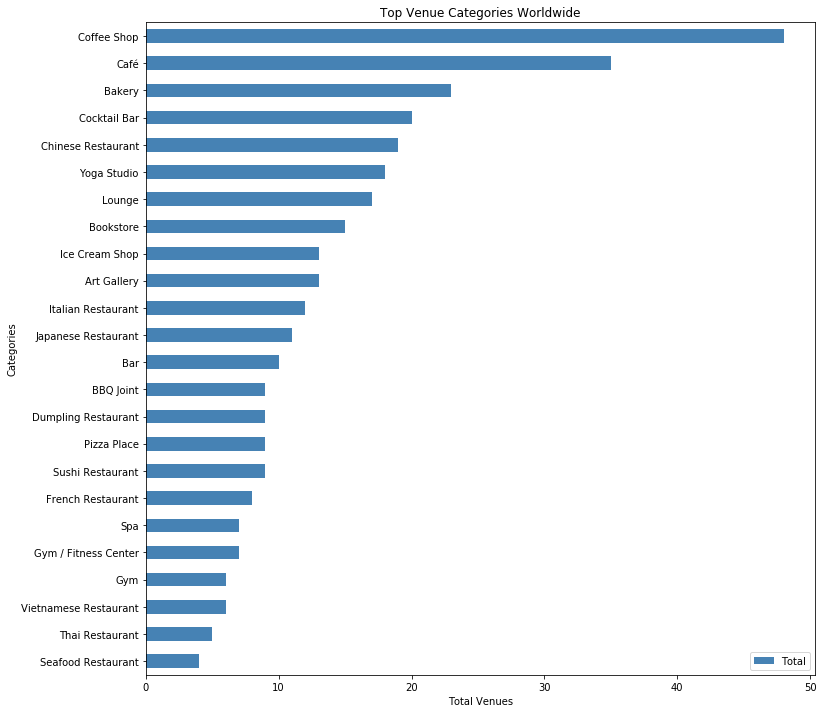

In [78]:
#### keep only the first and last column of the dataframe
all_top_cities_simplified = all_top_cities.drop(['Counts New York', 'Counts Hong Kong', 'Counts Moscow', 'Counts Beijing', 'Counts London', 'Counts Shangai', 'Counts San Francisco', 'Counts Shenzhen', 'Counts Seoul', 'Counts Mumbai'], axis=1)
all_top_cities_simplified = all_top_cities_simplified.sort_values(by=['Total'], ascending=True)
# generate plot
all_top_cities_simplified.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Total Venues')
plt.title('Top Venue Categories Worldwide')
# annotate value labels to each country
for index, value in enumerate(all_top_cities_simplified): 
    label = 'Total'

plt.show()

### We end up with 19 categories that are trending in at least 3 of the top cities

## II- France

### Because markets can differ depending on the country we will take a look at the top cities in France and compare our results with what we found in the previous dataframe

source: https://frenchtogether.com/french-cities/

### a) Paris

In [79]:
#### Get the coordinates

address = 'Paris, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Paris are 48.8566101, 2.3514992.


In [80]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [81]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
paris = dataframe.loc[:, filtered_columns]

# clean columns
paris.columns = [col.split(".")[-1] for col in paris.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
paris['categories'] = paris.apply(get_category_type, axis=1)

print(paris.shape)
paris.head()

(100, 4)


,name,categories,lat,lng
0,Cité de l'Architecture et du Patrimoine,Museum,48.862703,2.288654
1,La Vénus de Milo (Vénus de Milo),Exhibit,48.859943,2.337234
2,Jardins des Champs-Élysées,Garden,48.867850,2.314541
3,Opéra Garnier,Opera House,48.872125,2.331709
4,Cour Napoléon,Plaza,48.861172,2.335088


In [82]:
#### List all the categories found
paris.categories.unique()

array(['Museum', 'Exhibit', 'Garden', 'Opera House', 'Plaza',
       'Bubble Tea Shop', 'Concert Hall', 'Wine Bar', 'Restaurant',
       'Canal', 'French Restaurant', 'Toy / Game Store', 'Music Venue',
       'Cheese Shop', 'Udon Restaurant', 'Comic Shop',
       'Monument / Landmark', 'Park', 'Dance Studio', 'Breakfast Spot',
       'Historic Site', 'Art Gallery', 'Greek Restaurant',
       "Women's Store", 'Vegetarian / Vegan Restaurant', 'Farmers Market',
       'Bookstore', 'Theater', 'Dessert Shop', 'Scenic Lookout',
       'Italian Restaurant', 'Korean Restaurant', 'Hotel Bar',
       'Bike Rental / Bike Share', 'Food & Drink Shop',
       'Performing Arts Venue', 'Liquor Store', 'Burger Joint',
       'Pop-Up Shop', 'Church', 'Cocktail Bar', 'Clothing Store',
       'Pastry Shop', 'Seafood Restaurant', 'Art Museum', 'Bar',
       'Brewery', 'Cosmetics Shop', 'Creperie', 'Fountain',
       'Indie Movie Theater', 'Bistro', 'Botanical Garden',
       'Israeli Restaurant', 'Beer Sto

In [83]:
#### Get rid of the categories that are not useful for us (eg. public places)
paris = paris[paris.categories != 'Museum']
paris = paris[paris.categories != 'Exhibit']
paris = paris[paris.categories != 'Garden']
paris = paris[paris.categories != 'Opera House']
paris = paris[paris.categories != 'Plaza']
paris = paris[paris.categories != 'Concert Hall']
paris = paris[paris.categories != 'Canal']
paris = paris[paris.categories != 'Monument / Landmark']
paris = paris[paris.categories != 'Park']
paris = paris[paris.categories != 'Historic Site']
paris = paris[paris.categories != 'Farmers Market']
paris = paris[paris.categories != 'Theater']
paris = paris[paris.categories != 'Scenic Lookout']
paris = paris[paris.categories != 'Hotel Bar']
paris = paris[paris.categories != 'Church']
paris = paris[paris.categories != 'Art Museum']
paris = paris[paris.categories != 'Fountain']
paris = paris[paris.categories != 'Botanical Garden']
paris = paris[paris.categories != 'Pedestrian Plaza']
paris = paris[paris.categories != 'Multiplex']

In [84]:
#### Map the results

# Create map
paris_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(paris.lat, paris.lng, paris.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(paris_map)

# display map
paris_map

In [85]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_paris = pd.DataFrame(paris['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Paris'))
top_paris

,Categories,Counts Paris
0,French Restaurant,10
1,Wine Bar,5
2,Italian Restaurant,4
3,Bookstore,3
4,Bakery,2
5,Breakfast Spot,2
6,Indie Movie Theater,2
7,Art Gallery,2
8,Seafood Restaurant,2
9,Cocktail Bar,2


### b) Marseille

In [86]:
#### Get the coordinates

address = 'Marseille, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Marseille are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Marseille are 43.2961743, 5.3699525.


In [87]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [88]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
marseille = dataframe.loc[:, filtered_columns]

# clean columns
marseille.columns = [col.split(".")[-1] for col in marseille.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
marseille['categories'] = marseille.apply(get_category_type, axis=1)

print(marseille.shape)
marseille.head()

(100, 4)


,name,categories,lat,lng
0,Cinéma Chambord,Multiplex,43.273272,5.391352
1,Puces de Marseille,Flea Market,43.326988,5.362787
2,Place de la Joliette,Plaza,43.304866,5.366156
3,The Black Unicorn,Pub,43.295591,5.396479
4,Plage de Saint-Éstève,Beach,43.284263,5.315736


In [89]:
#### List all the categories found
marseille.categories.unique()

array(['Multiplex', 'Flea Market', 'Plaza', 'Pub', 'Beach',
       'Harbor / Marina', 'Garden', 'Provençal Restaurant',
       'Tapas Restaurant', 'Sandwich Place', 'French Restaurant',
       'Seafood Restaurant', 'Art Museum', 'Castle', 'Neighborhood',
       'Pizza Place', 'Coffee Shop', 'Historic Site', 'Gift Shop',
       'Theater', 'Sports Club', 'Bar', 'Steakhouse', 'Hotel',
       'Cosmetics Shop', 'Deli / Bodega', 'Nightclub', 'Supermarket',
       'Fast Food Restaurant', 'Bakery', 'Cupcake Shop',
       'Middle Eastern Restaurant', 'Candy Store', 'Gym / Fitness Center',
       'Palace', 'Monument / Landmark', 'Waterfront', 'Gas Station',
       'Grocery Store', 'Electronics Store', 'Bay', 'Italian Restaurant',
       'Outdoor Sculpture', 'History Museum', 'Shopping Mall',
       'Restaurant', 'Beach Bar', 'Tea Room', 'Gastropub', 'Park',
       'Chinese Restaurant', 'Speakeasy', 'Cultural Center',
       'Big Box Store'], dtype=object)

In [90]:
#### Get rid of the categories that are not useful for us (eg. public places)
marseille = marseille[marseille.categories != 'Multiplex']
marseille = marseille[marseille.categories != 'Flea Market']
marseille = marseille[marseille.categories != 'Plaza']
marseille = marseille[marseille.categories != 'Beach']
marseille = marseille[marseille.categories != 'Harbor / Marina']
marseille = marseille[marseille.categories != 'Garden']
marseille = marseille[marseille.categories != 'Art Museum']
marseille = marseille[marseille.categories != 'Castle']
marseille = marseille[marseille.categories != 'Neighborhood']
marseille = marseille[marseille.categories != 'Historic Site']
marseille = marseille[marseille.categories != 'Theater']
marseille = marseille[marseille.categories != 'Sports Club']
marseille = marseille[marseille.categories != 'Hotel']
marseille = marseille[marseille.categories != 'Supermarket']
marseille = marseille[marseille.categories != 'Palace']
marseille = marseille[marseille.categories != 'Monument / Landmark']
marseille = marseille[marseille.categories != 'Waterfront']
marseille = marseille[marseille.categories != 'Bay']
marseille = marseille[marseille.categories != 'Outdoor Sculpture']
marseille = marseille[marseille.categories != 'History Museum']
marseille = marseille[marseille.categories != 'Shopping Mall']
marseille = marseille[marseille.categories != 'Beach Bar']
marseille = marseille[marseille.categories != 'Park']
marseille = marseille[marseille.categories != 'Cultural Center']

In [91]:
#### Map the results

# Create map
marseille_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(marseille.lat, marseille.lng, marseille.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(marseille_map)

# display map
marseille_map

In [92]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_marseille = pd.DataFrame(marseille['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Marseille'))
top_marseille

,Categories,Counts Marseille
0,French Restaurant,7
1,Seafood Restaurant,5
2,Bar,4
3,Coffee Shop,3
4,Pub,3
5,Bakery,2
6,Sandwich Place,2
7,Candy Store,2
8,Pizza Place,2
9,Tapas Restaurant,2


### c) Lyon

In [93]:
#### Get the coordinates

address = 'Lyon, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Lyon are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Lyon are 45.7578137, 4.8320114.


In [94]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [95]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
lyon = dataframe.loc[:, filtered_columns]

# clean columns
lyon.columns = [col.split(".")[-1] for col in lyon.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
lyon['categories'] = lyon.apply(get_category_type, axis=1)

print(lyon.shape)
lyon.head()

(100, 4)


,name,categories,lat,lng
0,Parc de la Tête d'Or,Park,45.776975,4.852450
1,La Fourmilière,Bistro,45.752366,4.839450
2,Le Sud,French Restaurant,45.756257,4.835592
3,Léon de Bruxelles,Restaurant,45.716849,4.855809
4,Halle Tony Garnier,Concert Hall,45.729960,4.824997


In [96]:
#### List all the categories found
lyon.categories.unique()

array(['Park', 'Bistro', 'French Restaurant', 'Restaurant',
       'Concert Hall', 'Sandwich Place', 'Plaza', 'Pizza Place', 'Bar',
       'Café', 'Electronics Store', 'Pet Store', 'Italian Restaurant',
       'Hotel', 'Beer Bar', 'Cocktail Bar', 'Public Art',
       'Japanese Restaurant', 'Multiplex', 'Falafel Restaurant', 'Museum',
       'Soccer Field', 'Historic Site', 'Ice Cream Shop',
       'Sculpture Garden', 'Bakery', 'Clothing Store',
       'Athletics & Sports', 'Church', 'Scenic Lookout', 'Coffee Shop',
       'Fast Food Restaurant', 'Soccer Stadium', 'Lyonese Bouchon',
       'Brasserie', 'Neighborhood', 'Dessert Shop', 'Pub',
       'Deli / Bodega', 'Bridge', 'New American Restaurant',
       'Burger Joint', 'Garden', 'Indian Restaurant', 'Diner',
       'Comedy Club'], dtype=object)

In [97]:
#### Get rid of the categories that are not useful for us (eg. public places)
lyon = lyon[lyon.categories != 'Park']
lyon = lyon[lyon.categories != 'Concert Hall']
lyon = lyon[lyon.categories != 'Plaza']
lyon = lyon[lyon.categories != 'Hotel']
lyon = lyon[lyon.categories != 'Public Art']
lyon = lyon[lyon.categories != 'Multiplex']
lyon = lyon[lyon.categories != 'Museum']
lyon = lyon[lyon.categories != 'Soccer Field']
lyon = lyon[lyon.categories != 'Historic Site']
lyon = lyon[lyon.categories != 'Sculpture Garden']
lyon = lyon[lyon.categories != 'Church']
lyon = lyon[lyon.categories != 'Scenic Lookout']
lyon = lyon[lyon.categories != 'Soccer Stadium']
lyon = lyon[lyon.categories != 'Neighborhood']
lyon = lyon[lyon.categories != 'Bridge']
lyon = lyon[lyon.categories != 'Garden']
lyon = lyon[lyon.categories != 'Supermarket']

In [98]:
#### Map the results

# Create map
lyon_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(lyon.lat, lyon.lng, lyon.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(lyon_map)

# display map
lyon_map

In [99]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_lyon = pd.DataFrame(lyon['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Lyon'))
top_lyon

,Categories,Counts Lyon
0,French Restaurant,12
1,Bar,8
2,Cocktail Bar,4
3,Lyonese Bouchon,4
4,Fast Food Restaurant,3
5,Bakery,3
6,Bistro,2
7,Ice Cream Shop,2
8,Dessert Shop,2
9,Falafel Restaurant,2


### d) Toulouse

In [100]:
#### Get the coordinates

address = 'Toulouse, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toulouse are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toulouse are 43.6044622, 1.4442469.


In [101]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [102]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
toulouse = dataframe.loc[:, filtered_columns]

# clean columns
toulouse.columns = [col.split(".")[-1] for col in toulouse.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
toulouse['categories'] = toulouse.apply(get_category_type, axis=1)

print(toulouse.shape)
toulouse.head()

(100, 4)


,name,categories,lat,lng
0,Le Cantou,French Restaurant,43.612058,1.384024
1,Vasco Le Gamma,Bar,43.598792,1.433099
2,Burger à la Une - Saint Pierre,Burger Joint,43.604239,1.436417
3,Le Peyrolières,French Restaurant,43.600054,1.441008
4,O'Sushi,Sushi Restaurant,43.635568,1.483498


In [103]:
#### List all the categories found
toulouse.categories.unique()

array(['French Restaurant', 'Bar', 'Burger Joint', 'Sushi Restaurant',
       'Theme Park', 'Multiplex', 'Diner', 'Gastropub', 'Plaza', 'Pub',
       'City Hall', 'Sandwich Place', 'Clothing Store', 'Hotel',
       'Pharmacy', 'Beer Bar', 'Mobile Phone Shop', 'Garden',
       'Hobby Shop', 'Wine Bar', 'Stadium', 'Pizza Place', 'Nightclub',
       'Japanese Restaurant', 'Bookstore', 'Park', 'Snack Place',
       'Opera House', 'Pedestrian Plaza', 'Food', 'Café',
       'Soccer Stadium', 'Restaurant', 'Bowling Alley', 'Concert Hall',
       'Cocktail Bar', 'Department Store', 'Fast Food Restaurant',
       'Tea Room', 'Bakery', 'Chinese Restaurant', 'Coffee Shop',
       'Racetrack', 'Art Museum', 'Ice Cream Shop', 'Supermarket',
       'Electronics Store', 'Steakhouse'], dtype=object)

In [104]:
#### Get rid of the categories that are not useful for us (eg. public places)
toulouse = toulouse[toulouse.categories != 'Theme Park']
toulouse = toulouse[toulouse.categories != 'Multiplex']
toulouse = toulouse[toulouse.categories != 'Plaza']
toulouse = toulouse[toulouse.categories != 'City Hall']
toulouse = toulouse[toulouse.categories != 'Hotel']
toulouse = toulouse[toulouse.categories != 'Pharmacy']
toulouse = toulouse[toulouse.categories != 'Garden']
toulouse = toulouse[toulouse.categories != 'Stadium']
toulouse = toulouse[toulouse.categories != 'Park']
toulouse = toulouse[toulouse.categories != 'Opera House']
toulouse = toulouse[toulouse.categories != 'Pedestrian Plaza']
toulouse = toulouse[toulouse.categories != 'Soccer Stadium']
toulouse = toulouse[toulouse.categories != 'Concert Hall']
toulouse = toulouse[toulouse.categories != 'Department Store']
toulouse = toulouse[toulouse.categories != 'Art Museum']
toulouse = toulouse[toulouse.categories != 'Supermarket']

In [105]:
#### Map the results

# Create map
toulouse_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(toulouse.lat, toulouse.lng, toulouse.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(toulouse_map)

# display map
toulouse_map

In [106]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_toulouse = pd.DataFrame(toulouse['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Toulouse'))
top_toulouse

,Categories,Counts Toulouse
0,French Restaurant,19
1,Bar,6
2,Pub,4
3,Wine Bar,3
4,Café,3
5,Clothing Store,3
6,Pizza Place,2
7,Japanese Restaurant,2
8,Sandwich Place,2
9,Tea Room,2


### e) Nice

In [107]:
#### Get the coordinates

address = 'Nice, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Nice are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Nice are 43.7009358, 7.2683912.


In [108]:
#### Create URL to get list of trending venues from Foursquare

LIMIT = 100
radius = 5000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

In [109]:
#### Send the request and save the results in a cleaned dataframe

#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nice = dataframe.loc[:, filtered_columns]

# clean columns
nice.columns = [col.split(".")[-1] for col in nice.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
nice['categories'] = nice.apply(get_category_type, axis=1)

print(nice.shape)
nice.head()

(100, 4)


,name,categories,lat,lng
0,Pool Bar – Radisson Blu Hotel,Hotel Bar,43.684512,7.234965
1,Hotel Royal-Riviera,Hotel,43.701960,7.328728
2,Di Piu,Italian Restaurant,43.695322,7.273337
3,Cascade De Gairaut,Waterfall,43.737755,7.259804
4,Brasserie Borriglione,French Restaurant,43.713482,7.261636


In [110]:
#### List all the categories found
nice.categories.unique()

array(['Hotel Bar', 'Hotel', 'Italian Restaurant', 'Waterfall',
       'French Restaurant', 'Furniture / Home Store', 'Museum', 'Park',
       'Middle Eastern Restaurant', 'Candy Store', 'Restaurant',
       'Department Store', 'Beach', 'Jazz Club', 'Gay Bar',
       'Ice Cream Shop', 'Tapas Restaurant', 'Supermarket', 'Garden',
       'Scenic Lookout', 'Outdoor Sculpture', 'Lounge', 'Thai Restaurant',
       'Hill', 'Historic Site', 'Tennis Court', 'Café', 'Boutique',
       'Opera House', 'Seafood Restaurant', 'Wine Bar', 'Plaza', 'Bistro',
       'Bakery', 'Construction & Landscaping', 'Pedestrian Plaza',
       'Fountain', 'Bagel Shop', 'Mediterranean Restaurant',
       'Dessert Shop', 'Flower Shop', 'Pizza Place',
       'Provençal Restaurant', 'Multiplex', 'Art Museum',
       'Farmers Market', 'Coffee Shop', 'Japanese Restaurant'],
      dtype=object)

In [111]:
#### Get rid of the categories that are not useful for us (eg. public places)
nice = nice[nice.categories != 'Hotel Bar']
nice = nice[nice.categories != 'Hotel']
nice = nice[nice.categories != 'Food Court']
nice = nice[nice.categories != 'Waterfall']
nice = nice[nice.categories != 'Museum']
nice = nice[nice.categories != 'Park']
nice = nice[nice.categories != 'Department Store']
nice = nice[nice.categories != 'Beach']
nice = nice[nice.categories != 'Supermarket']
nice = nice[nice.categories != 'Historic Site']
nice = nice[nice.categories != 'Garden']
nice = nice[nice.categories != 'Scenic Lookout']
nice = nice[nice.categories != 'Outdoor Sculpture']
nice = nice[nice.categories != 'Hill']
nice = nice[nice.categories != 'Opera House']
nice = nice[nice.categories != 'Plaza']
nice = nice[nice.categories != 'Pedestrian Plaza']
nice = nice[nice.categories != 'Fountain']
nice = nice[nice.categories != 'Multiplex']
nice = nice[nice.categories != 'Art Museum']
nice = nice[nice.categories != 'Farmers Market']

In [112]:
#### Map the results

# Create map
nice_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(nice.lat, nice.lng, nice.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(nice_map)

# display map
nice_map

In [113]:
#### Count the unique categories and display the top 20

#Count number of unique categories
top_nice = pd.DataFrame(nice['categories'].value_counts().head(20).rename_axis('Categories').reset_index(name='Counts Nice'))
top_nice

,Categories,Counts Nice
0,French Restaurant,15
1,Italian Restaurant,8
2,Ice Cream Shop,4
3,Restaurant,4
4,Mediterranean Restaurant,4
5,Wine Bar,3
6,Seafood Restaurant,2
7,Bistro,2
8,Middle Eastern Restaurant,2
9,Tapas Restaurant,1


### Mapping the french cities with Folium

In [3]:
#Create the map
map_french_cities = folium.Map(location=['43.1257311', '5.9304919'], zoom_start=5)
#Add markers from coordinates previously obtained with Nominatim
folium.CircleMarker([43.0935105, 5.8393953], radius=5, popup='Six-Fours-les-plages', color='red', fill=True, fill_color='red', fill_opacity=1, parse_html=False).add_to(map_french_cities)
folium.CircleMarker([48.8566101, 2.3514992], radius=5, popup='Paris', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_french_cities)
folium.CircleMarker([43.2961743, 5.3699525], radius=5, popup='Marseille', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_french_cities)
folium.CircleMarker([45.7578137, 4.8320114], radius=5, popup='Lyon', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_french_cities)
folium.CircleMarker([43.6044622, 1.4442469], radius=5, popup='Toulouse', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_french_cities)
folium.CircleMarker([43.7009358, 7.2683912], radius=5, popup='Nice', color='blue', fill=True, fill_color='blue', fill_opacity=1, parse_html=False).add_to(map_french_cities)
map_french_cities

### We can now merge our results in a new dataframe to get a view of the top categories combined

#### We'll get rid of any category that is not found in at least 2 cities

In [114]:
# Merging all dataframes
all_french_cities = pd.concat((iDF.set_index('Categories') for iDF in [top_paris, top_marseille, top_lyon, top_toulouse, top_nice]), axis=1, join='outer').rename_axis('Categories')
# Drop rows if the venues are not present in at least 2 cities
all_french_cities.dropna(thresh=2, inplace=True)
#all_french_cities.fillna(0, inplace=True)
all_french_cities.loc[:,'Total'] = all_french_cities.sum(axis=1)
all_french_cities = all_french_cities.sort_values(by=['Total'], ascending=False)
all_french_cities

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,Counts Paris,Counts Marseille,Counts Lyon,Counts Toulouse,Counts Nice,Total
Categories,,,,,,
French Restaurant,10.0,7.0,12.0,19.0,15.0,63.0
Bar,NaN,4.0,8.0,6.0,NaN,18.0
Italian Restaurant,4.0,2.0,1.0,NaN,8.0,15.0
Wine Bar,5.0,NaN,NaN,3.0,3.0,11.0
Restaurant,NaN,2.0,2.0,2.0,4.0,10.0
Seafood Restaurant,2.0,5.0,NaN,NaN,2.0,9.0
Pub,NaN,3.0,2.0,4.0,NaN,9.0
Bakery,2.0,2.0,3.0,NaN,1.0,8.0
Ice Cream Shop,NaN,NaN,2.0,1.0,4.0,7.0


#### We can also visualize the data in a barchart for easy interpretation

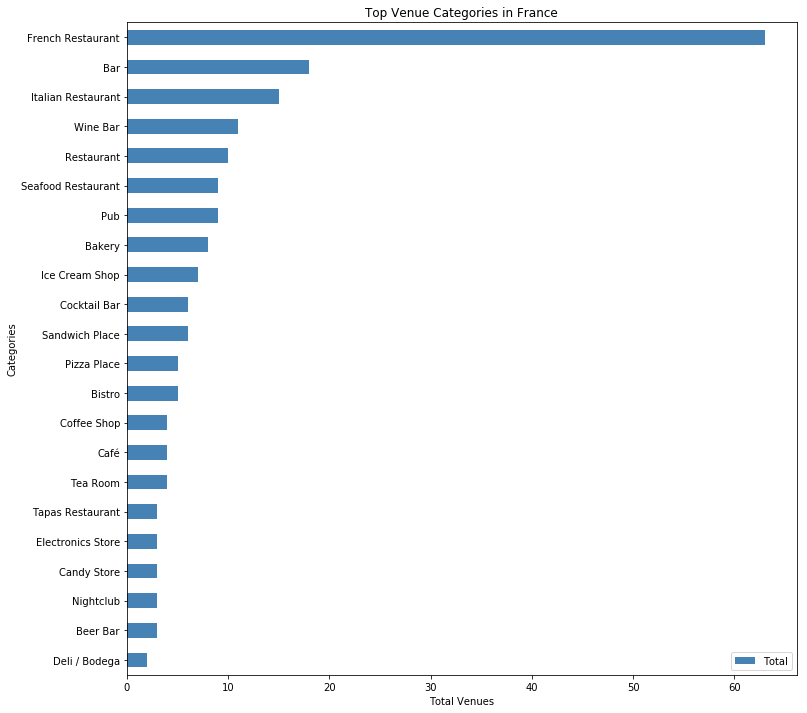

In [115]:
#### keep only the first and last column of the dataframe
all_french_cities_simplified = all_french_cities.drop(['Counts Paris', 'Counts Marseille', 'Counts Lyon', 'Counts Toulouse', 'Counts Nice'], axis=1)
all_french_cities_simplified = all_french_cities_simplified.sort_values(by=['Total'], ascending=True)
# generate plot
all_french_cities_simplified.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Total Venues')
plt.title('Top Venue Categories in France')
# annotate value labels to each country
for index, value in enumerate(all_french_cities_simplified): 
    label = 'Total'

plt.show()

## III- Six-Fours-les-Plages

### Now we can look for the top venues in the area of Six-Fours-les-Plages to finally compare them to all the previous results found

#### Get the coordinates

In [116]:
address = 'Six-fours-les-plages, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Six-fours-les-plages are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Six-fours-les-plages are 43.0935105, 5.8393953.


#### Create URL to get list of trending venues from Foursquare

In [117]:
LIMIT = 100
radius = 10000
section = 'trending'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    section)

#### Send the request and save the results in a cleaned dataframe

In [118]:
#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['groups'][0]['items']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
six_fours = dataframe.loc[:, filtered_columns]

# clean columns
six_fours.columns = [col.split(".")[-1] for col in six_fours.columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# filter the category for each row
six_fours['categories'] = six_fours.apply(get_category_type, axis=1)

print(six_fours.shape)
six_fours.head()

(77, 4)


,name,categories,lat,lng
0,Le Scotch,Restaurant,43.136313,5.755721
1,La Plage,Cocktail Bar,43.107283,5.941968
2,Crêperie au Roy d'Ys,Creperie,43.117125,5.803293
3,Plage des Sablettes,Beach,43.078386,5.896482
4,Les Deux Frères,Restaurant,43.078795,5.893820


In [119]:
#### List all the categories found
six_fours.categories.unique()

array(['Restaurant', 'Cocktail Bar', 'Creperie', 'Beach', 'Stadium',
       'Hotel', 'Supermarket', 'History Museum', 'Ice Cream Shop',
       'Big Box Store', 'Fast Food Restaurant', 'Cosmetics Shop',
       'French Restaurant', 'Mediterranean Restaurant',
       'Department Store', 'Electronics Store', 'Café', 'Historic Site',
       'Bakery', 'Ski Chairlift', 'Nightclub', 'Harbor / Marina',
       'Mountain', 'Mobile Phone Shop', 'Market', 'Sandwich Place',
       'Provençal Restaurant', 'Plaza', 'Pizza Place', 'Bar',
       'Comfort Food Restaurant', 'Clothing Store', 'Trail',
       'Seafood Restaurant', 'Salad Place', 'Coffee Shop', 'Lounge',
       'Sushi Restaurant', 'Sports Bar', 'Rugby Pitch', 'Bay',
       'Concert Hall'], dtype=object)

In [120]:
#### Get rid of the categories that are not useful for us (eg. public places)
six_fours = six_fours[six_fours.categories != 'Beach']
six_fours = six_fours[six_fours.categories != 'Stadium']
six_fours = six_fours[six_fours.categories != 'Hotel']
six_fours = six_fours[six_fours.categories != 'Supermarket']
six_fours = six_fours[six_fours.categories != 'History Museum']
six_fours = six_fours[six_fours.categories != 'Department Store']
six_fours = six_fours[six_fours.categories != 'Historic Site']
six_fours = six_fours[six_fours.categories != 'Plaza']
six_fours = six_fours[six_fours.categories != 'Ski Chairlift']
six_fours = six_fours[six_fours.categories != 'Harbor / Marina']
six_fours = six_fours[six_fours.categories != 'Mountain']
six_fours = six_fours[six_fours.categories != 'Market']
six_fours = six_fours[six_fours.categories != 'Trail']
six_fours = six_fours[six_fours.categories != 'Bay']
six_fours = six_fours[six_fours.categories != 'Concert Hall']

#### List and coordinates of restaurants owned by the client:
#### - La Vague, 43.110279, 5.812283
#### - Pouss Pouss, 43.105783, 5.81394
#### - Moom, 43.108679, 5.813582

In [121]:
#### Map the results and the restaurants owned by the client

# Create map
six_fours_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(six_fours.lat, six_fours.lng, six_fours.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(six_fours_map)
    
## Venues owned by the client in yellow    
# add 'la vague' results as markers
folium.CircleMarker(
        [43.110279, 5.812283],
        radius=5,
        color='yellow',
        popup='La Vague',
        fill = True,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(six_fours_map)
# add 'Pouss Pouss' results as markers
folium.CircleMarker(
        [43.105783, 5.81394],
        radius=5,
        color='yellow',
        popup='Pouss Pouss',
        fill = True,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(six_fours_map)
# add 'Moom' results as markers
folium.CircleMarker(
        [43.108679, 5.813582],
        radius=5,
        color='yellow',
        popup='Moom',
        fill = True,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(six_fours_map)

# display map
six_fours_map

#### Count the unique categories and display them

In [122]:
#Count number of unique categories
top_six_fours = pd.DataFrame(six_fours['categories'].value_counts().rename_axis('Categories').reset_index(name='Counts'))
top_six_fours

,Categories,Counts
0,Bar,6
1,French Restaurant,5
2,Cocktail Bar,4
3,Ice Cream Shop,4
4,Restaurant,4
5,Café,2
6,Mediterranean Restaurant,2
7,Pizza Place,2
8,Sandwich Place,2
9,Coffee Shop,1


## IV- Analysis

### We will take the categories found in the top worldwide and French cities to see if similar businesses are present in the client's city

In [123]:
# Getting rid of the columns 'Total'
all_top_cities = all_top_cities.drop(['Total'], axis=1)
all_french_cities = all_french_cities.drop(['Total'], axis=1)
# Merging both dataframes
all_cities = pd.merge(all_top_cities, all_french_cities, how='outer', on=['Categories'])
all_cities.loc[:,'Total'] = all_cities.sum(axis=1)
all_cities = all_cities.sort_values(by=['Total'], ascending=False)
print(all_cities.shape)
all_cities

(36, 16)


,Counts New York,Counts Hong Kong,Counts Moscow,Counts Beijing,Counts London,Counts Shangai,Counts San Francisco,Counts Shenzhen,Counts Seoul,Counts Mumbai,Counts Paris,Counts Marseille,Counts Lyon,Counts Toulouse,Counts Nice,Total
Categories,,,,,,,,,,,,,,,,
French Restaurant,NaN,2.0,NaN,1.0,NaN,3.0,NaN,NaN,2.0,NaN,10.0,7.0,12.0,19.0,15.0,71.0
Coffee Shop,NaN,5.0,7.0,8.0,NaN,3.0,4.0,13.0,6.0,2.0,NaN,3.0,NaN,NaN,1.0,52.0
Café,NaN,6.0,NaN,6.0,3.0,2.0,2.0,7.0,4.0,5.0,NaN,NaN,NaN,3.0,1.0,39.0
Bakery,2.0,NaN,NaN,1.0,3.0,7.0,3.0,NaN,4.0,3.0,2.0,2.0,3.0,NaN,1.0,31.0
Bar,NaN,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0,NaN,4.0,8.0,6.0,NaN,28.0
Italian Restaurant,4.0,3.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN,4.0,2.0,1.0,NaN,8.0,27.0
Cocktail Bar,NaN,4.0,NaN,2.0,7.0,2.0,NaN,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,26.0
Ice Cream Shop,6.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,4.0,NaN,NaN,2.0,1.0,4.0,20.0
Chinese Restaurant,NaN,5.0,NaN,6.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0


#### Group all the top dataframes and keep only the columns 'Categories' and 'Total'

In [124]:
# Rename total columns to differentiate them on the graph
top_six_fours = top_six_fours.rename(columns={'Counts': 'Six-Fours'})
all_french_cities_simplified = all_french_cities_simplified.rename(columns={'Total': 'France'})
all_top_cities_simplified = all_top_cities_simplified.rename(columns={'Total': 'World'})
# merge dataframes
all_top_0 = pd.merge(top_six_fours, all_french_cities_simplified, how='outer', on=['Categories'])
all_top = pd.merge(all_top_0, all_top_cities_simplified, how='outer', on=['Categories'])
all_top.set_index('Categories', inplace=True)
all_top.head()

,Six-Fours,France,World
Categories,,,
Bar,6.0,18.0,10.0
French Restaurant,5.0,63.0,8.0
Cocktail Bar,4.0,6.0,20.0
Ice Cream Shop,4.0,7.0,13.0
Restaurant,4.0,10.0,NaN


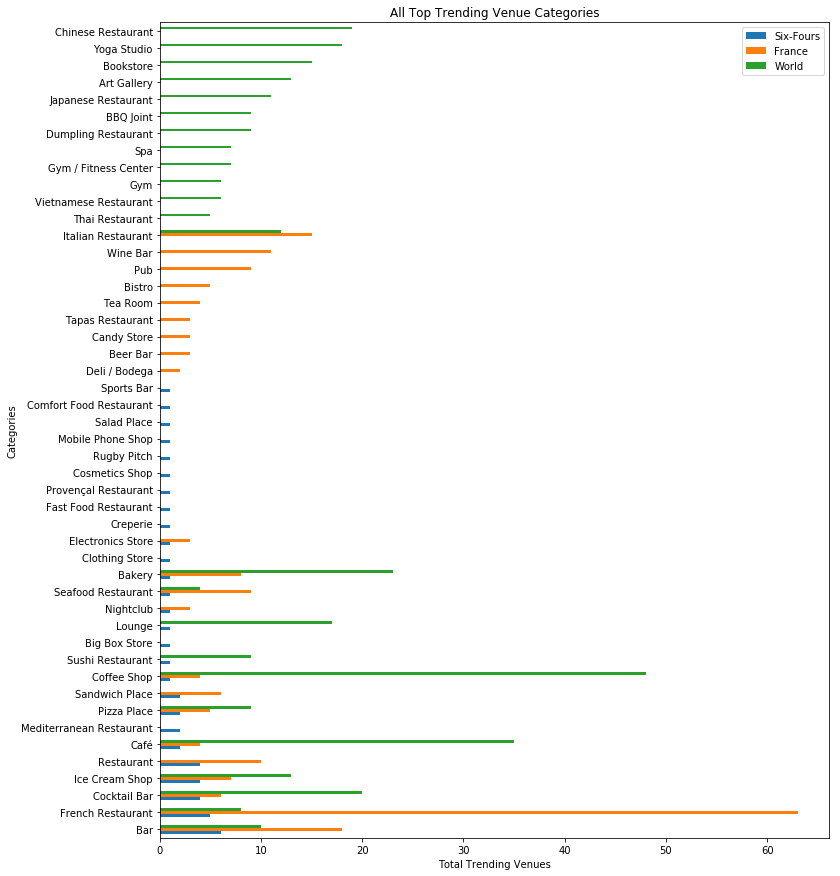

In [125]:
#### Plot all results in a bar graph for easy interpretation

# generate plot
all_top.plot(kind='barh', figsize=(12, 15))
plt.xlabel('Total Trending Venues')
plt.title('All Top Trending Venue Categories')
# annotate value labels to each country
for index, value in enumerate(all_top): 
    label = 'Total'

plt.show()

### We will now look for the categories in the area of Six-Fours-les-Plages that are missing from the trending venues and we will focus on restaurants and bars as requested by the client

In [128]:
# keep only the first column of all_cities dataframe
keep = [0]
all_cities_total = all_cities.drop(all_cities.columns.difference(keep), axis=1)
# Merging both dataframes
result = pd.merge(all_cities_total, top_six_fours, how='outer', on=['Categories'])
# Keep only categories not found in six_fours dataframe
result.fillna(0, inplace=True)
result = result[result['Six-Fours']<1]
result = result.rename(columns={'Six-Fours': 'Total'})
print(result.shape)
result.reset_index(drop=True)

(21, 2)


,Categories,Total
0,Italian Restaurant,0.0
1,Chinese Restaurant,0.0
2,Yoga Studio,0.0
3,Bookstore,0.0
4,Art Gallery,0.0
5,Japanese Restaurant,0.0
6,Wine Bar,0.0
7,Dumpling Restaurant,0.0
8,BBQ Joint,0.0
9,Pub,0.0


In [129]:
address = 'Six-fours-les-plages, France'

geolocator = Nominatim(user_agent="None")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Six-fours-les-plages are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Six-fours-les-plages are 43.0935105, 5.8393953.


### - Italian Restaurants

#### Create URL to get a list of Italian Restaurants from Foursquare

In [130]:
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d110941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [131]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e0b70e9b9a389001b9146a6'},
 'response': {'venues': [{'id': '53f31f57498e486e0d7f6994',
    'name': 'ô petit monde',
    'location': {'lat': 43.114376,
     'lng': 5.79004,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.114376,
       'lng': 5.79004}],
     'distance': 4635,
     'cc': 'FR',
     'country': 'France',
     'formattedAddress': ['France']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1577808144',
    'hasPerk': False},
   {'id': '522769d011d2c4c52fa8390f',
    'name': 'Verderosa',
    'location': {'address': 'Av. Jean Albert Lamarque C. Commercial Leclerc',
     'lat': 43.108842,
     'lng': 5.859179,
     'labeledLatLngs': [{'label': 'display',
       '

#### Send the request and save the results in a cleaned dataframe

In [132]:
#json request
results = requests.get(url).json()

#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
italian_restaurants = dataframe.loc[:, filtered_columns]

# clean columns
italian_restaurants.columns = [col.split(".")[-1] for col in italian_restaurants.columns]

print(italian_restaurants.shape)
italian_restaurants

(9, 3)


,name,lat,lng
0,ô petit monde,43.114376,5.790040
1,Verderosa,43.108842,5.859179
2,Piazza del teatro,43.118051,5.803613
3,L'osteria,43.118176,5.804367
4,Le pinocchio,43.077472,5.804287
5,Restorante Delarte,43.123332,5.875269
6,La Sagno,43.101642,5.881517
7,Restaurant Le Grillon,43.117616,5.801043
8,La Cascatelle,43.101424,5.881160


#### Map the result

In [133]:
#### Map the results

# Create map
italian_restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(italian_restaurants.lat, italian_restaurants.lng, italian_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(italian_restaurants_map)

# display map
italian_restaurants_map

### - Chinese Restaurants	

In [134]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d145941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [135]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 2'

In [136]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
chinese_restaurants = dataframe.loc[:, filtered_columns]

# clean columns
chinese_restaurants.columns = [col.split(".")[-1] for col in chinese_restaurants.columns]

print(chinese_restaurants.shape)
chinese_restaurants

(2, 3)


,name,lat,lng
0,Frenchy Wok,43.120913,5.846550
1,La Baie d'Ha Long,43.087171,5.900294


In [137]:
#### Map the results

# Create map
chinese_restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(chinese_restaurants.lat, chinese_restaurants.lng, chinese_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(chinese_restaurants_map)

# display map
chinese_restaurants_map

### - Japanese Restaurants	

In [138]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d111941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [139]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 4'

In [140]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
japanese_restaurants = dataframe.loc[:, filtered_columns]

# clean columns
japanese_restaurants.columns = [col.split(".")[-1] for col in japanese_restaurants.columns]

print(japanese_restaurants.shape)
japanese_restaurants

(4, 3)


,name,lat,lng
0,Gaïjin Sushi,43.087398,5.855260
1,Moom,43.108679,5.813582
2,Le Karma Sablettes,43.108358,5.877532
3,Azuki Sushi,43.117735,5.807487


In [141]:
#### Map the results

# Create map
japanese_restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(japanese_restaurants.lat, japanese_restaurants.lng, japanese_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(japanese_restaurants_map)

# display map
japanese_restaurants_map

### - Wine Bars

In [142]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d123941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [143]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 2'

In [144]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
wine_bars = dataframe.loc[:, filtered_columns]

# clean columns
wine_bars.columns = [col.split(".")[-1] for col in wine_bars.columns]

print(wine_bars.shape)
wine_bars

(2, 3)


,name,lat,lng
0,La Palissade De Bucarin,43.105652,5.824098
1,L'omnibar,43.118473,5.794109


In [145]:
#### Map the results

# Create map
wine_bars_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(wine_bars.lat, wine_bars.lng, wine_bars.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(wine_bars_map)

# display map
wine_bars_map

### - Dumpling Restaurants

In [146]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d108941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [147]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 0'

### - Pubs

In [148]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d11b941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [149]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 2'

In [150]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
pubs = dataframe.loc[:, filtered_columns]

# clean columns
pubs.columns = [col.split(".")[-1] for col in pubs.columns]

print(pubs.shape)
pubs

(2, 3)


,name,lat,lng
0,O'Neill's,43.102081,5.825109
1,Le club du masque d'Or,43.139716,5.848717


In [151]:
#### Map the results

# Create map
pubs_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(pubs.lat, pubs.lng, pubs.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(pubs_map)

# display map
pubs_map

### - Thai Restaurants

In [152]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d149941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [153]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 1'

In [154]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
thai_restaurants = dataframe.loc[:, filtered_columns]

# clean columns
thai_restaurants.columns = [col.split(".")[-1] for col in thai_restaurants.columns]

print(thai_restaurants.shape)
thai_restaurants

(1, 3)


,name,lat,lng
0,Pouss Pouss,43.105783,5.81394


In [155]:
#### Map the results

# Create map
thai_restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(thai_restaurants.lat, thai_restaurants.lng, thai_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(thai_restaurants_map)

# display map
thai_restaurants_map

### - Vietnamese Restaurants

In [156]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d14a941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [157]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 1'

In [158]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
vietnamese_restaurants = dataframe.loc[:, filtered_columns]

# clean columns
vietnamese_restaurants.columns = [col.split(".")[-1] for col in vietnamese_restaurants.columns]

print(vietnamese_restaurants.shape)
vietnamese_restaurants

(1, 3)


,name,lat,lng
0,New saigon,43.089897,5.878001


In [159]:
#### Map the results

# Create map
vietnamese_restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(vietnamese_restaurants.lat, vietnamese_restaurants.lng, vietnamese_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(vietnamese_restaurants_map)

# display map
vietnamese_restaurants_map

### - Vegetarian / Vegan Restaurants	

In [160]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d1d3941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [161]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 0'

### - Steakhouses

In [162]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d1cc941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [163]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 3'

In [164]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
steakhouses = dataframe.loc[:, filtered_columns]

# clean columns
steakhouses.columns = [col.split(".")[-1] for col in steakhouses.columns]

print(steakhouses.shape)
steakhouses

(3, 3)


,name,lat,lng
0,cafe bleu,43.096600,5.813280
1,Buffalo Grill,43.126206,5.878848
2,La Vague,43.110279,5.812283


In [165]:
#### Map the results

# Create map
steakhouses_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(steakhouses.lat, steakhouses.lng, steakhouses.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(steakhouses_map)

# display map
steakhouses_map

### - Bistros

In [166]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '52e81612bcbc57f1066b79f1'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [167]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 3'

In [168]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
bistros = dataframe.loc[:, filtered_columns]

# clean columns
bistros.columns = [col.split(".")[-1] for col in bistros.columns]

print(bistros.shape)
bistros

(3, 3)


,name,lat,lng
0,bar des sports,43.097725,5.826321
1,Bistro Frecate,43.115410,5.808307
2,Au P’tit Delices 70&,43.101283,5.879176


In [169]:
#### Map the results

# Create map
bistros_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(bistros.lat, bistros.lng, bistros.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(bistros_map)

# display map
bistros_map

### - Tea Rooms

In [170]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d1dc931735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [171]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 2'

In [172]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
tea_rooms = dataframe.loc[:, filtered_columns]

# clean columns
tea_rooms.columns = [col.split(".")[-1] for col in tea_rooms.columns]

print(tea_rooms.shape)
tea_rooms

(2, 3)


,name,lat,lng
0,Grigno’thé,43.117038,5.804262
1,Evanescence,43.102554,5.881521


In [173]:
#### Map the results

# Create map
tea_rooms_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(tea_rooms.lat, tea_rooms.lng, tea_rooms.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(tea_rooms_map)

# display map
tea_rooms_map

### - Middle Eastern Restaurant

In [174]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d115941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [175]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 0'

### - Burger Joints

In [176]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d16c941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [177]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 5'

In [178]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
burger_joints = dataframe.loc[:, filtered_columns]

# clean columns
burger_joints.columns = [col.split(".")[-1] for col in burger_joints.columns]

print(burger_joints.shape)
burger_joints

(5, 3)


,name,lat,lng
0,Burger King,43.109947,5.852065
1,Professeur Burger,43.121532,5.818675
2,Léa Burger,43.102500,5.880150
3,Enzo Burger,43.116530,5.805112
4,Chez Emy,43.079649,5.894730


In [179]:
#### Map the results

# Create map
burger_joints_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(burger_joints.lat, burger_joints.lng, burger_joints.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(burger_joints_map)

# display map
burger_joints_map

### - Tapas Restaurants

In [180]:
#### Create URL to get a list of the query from Foursquare
LIMIT = 100
radius = 5000
categoryId = '4bf58dd8d48988d1db931735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)

In [181]:
#### Send the request and display if venues have been found
#json request
results = requests.get(url).json()
'Venues found: {}'.format(len(results['response']['venues']))

'Venues found: 3'

In [182]:
#### Save the results in a cleaned dataframe
#normalize venues
venues = results['response']['venues']
dataframe = json_normalize(venues)

# filter columns
filtered_columns = ['name', 'location.lat', 'location.lng']
tapas_restaurants = dataframe.loc[:, filtered_columns]

# clean columns
tapas_restaurants.columns = [col.split(".")[-1] for col in tapas_restaurants.columns]

print(tapas_restaurants.shape)
tapas_restaurants

(3, 3)


,name,lat,lng
0,La Citadelle,43.077334,5.804402
1,GIO,43.117321,5.799365
2,Havana Club Sanary,43.088504,5.820061


In [183]:
#### Map the results

# Create map
tapas_restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the results as markers
for lat, lng, name in zip(tapas_restaurants.lat, tapas_restaurants.lng, tapas_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(tapas_restaurants_map)

# display map
tapas_restaurants_map

### Mapping all found restaurants and trending venues in Six-Fours-les-Plages to find pattern

In [184]:
# Create map
pattern_map = folium.Map(location=[latitude, longitude], zoom_start=13)

## Trending venues in red
for lat, lng, name in zip(six_fours.lat, six_fours.lng, six_fours.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=name,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(pattern_map)

## Potential direct competition venues in blue
# add italian_restaurants results as markers
for lat, lng, name in zip(italian_restaurants.lat, italian_restaurants.lng, italian_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)
# add chinese_restaurants results as markers
for lat, lng, name in zip(chinese_restaurants.lat, chinese_restaurants.lng, chinese_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)
# add japanese_restaurants results as markers
for lat, lng, name in zip(japanese_restaurants.lat, japanese_restaurants.lng, japanese_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)
# add wine_bars results as markers
for lat, lng, name in zip(wine_bars.lat, wine_bars.lng, wine_bars.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)    
# add pubs results as markers
for lat, lng, name in zip(pubs.lat, pubs.lng, pubs.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)    
# add thai_restaurants results as markers
for lat, lng, name in zip(thai_restaurants.lat, thai_restaurants.lng, thai_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)     
# add vietnamese_restaurants results as markers
for lat, lng, name in zip(vietnamese_restaurants.lat, vietnamese_restaurants.lng, vietnamese_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)    
# add steakhouses results as markers
for lat, lng, name in zip(steakhouses.lat, steakhouses.lng, steakhouses.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)       
# add bistros results as markers
for lat, lng, name in zip(bistros.lat, bistros.lng, bistros.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)    
# add tea_rooms results as markers
for lat, lng, name in zip(tea_rooms.lat, tea_rooms.lng, tea_rooms.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)
# add burger_joints results as markers
for lat, lng, name in zip(burger_joints.lat, burger_joints.lng, burger_joints.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)
# add tapas_restaurants results as markers
for lat, lng, name in zip(tapas_restaurants.lat, tapas_restaurants.lng, tapas_restaurants.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(pattern_map)
                
## Venues owned by the client in yellow    
# add 'la vague' results as markers
folium.CircleMarker(
        [43.110279, 5.812283],
        radius=5,
        color='yellow',
        popup='La Vague',
        fill = True,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(pattern_map)
# add 'Pouss Pouss' results as markers
folium.CircleMarker(
        [43.105783, 5.81394],
        radius=5,
        color='yellow',
        popup='Pouss Pouss',
        fill = True,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(pattern_map)
# add 'Moom' results as markers
folium.CircleMarker(
        [43.108679, 5.813582],
        radius=5,
        color='yellow',
        popup='Moom',
        fill = True,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(pattern_map)
# display map
pattern_map

## V- Conclusion

#### As we can observe through the multiple dataframes and graphs, a majority of the worlwide trending categories are found in the client's city, result of the globalization as we were expecting, but some of those categories cannot be found yet there. Also, we can visualize on the map above that most trending venues are grouped in specific areas when others are spread around.
#### We can make the conclusion that by opening a new business in the 'trending' areas and by focusing on the categories listed as follows, the client will maximize the chance of having a profitable business. If the client wants to open his new business nearby his already operational restaurants he can see on the same map that the best areas would be only a km north or south of those businesses as 2 'trending' areas can be found. 
#### Trending categories totally absent in the city : Vegetarian / Vegan restaurant, Middle Eastern restaurant and Dumpling restaurant
#### Trending categories present in small number : Vietnamese restaurant, Chinese, restaurant, Tapas restaurant, Wine bar and Pubs
#### For an opportunity in something different we also found that there is a lack of the following type of businesses in Six-fours-les-Plages: Music venue, Art gallery, Bookstore.

For report go to: 